In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT
from ROOT import TFile, TTree, TCanvas, TH2D, TH1F
from scipy import constants
import pandas as pd
#plt.rcParams['text.usetex'] = True

from scipy.stats import binned_statistic_2d
import plotly.graph_objects as go

Welcome to JupyROOT 6.22/09


In [3]:
f = TFile("selectedEventsSim_v2me06_101524_withContainedVar.root","READ") # with track completeness score
#f = TFile("selectedEventsSim_v2me06_071524_withContainedVar.root","READ") # with containment variable
#f = TFile("selectedEventsSim_v2me06_070924.root","READ") # new summer 2024 file from Nick, run 1
#f = TFile("selectedEventsSim_070924.root","READ") # old but ok (without error), run 3
#f = TFile("selectedEventsSim_050924_recoTest_2.root","READ") #old with error, run  3
t = f.Get("selectedEvents")

entries = t.GetEntries()
print(entries)

9964


In [4]:
muMom_list = []
piMom_list = []
lPMom_list = []

recoPiMom_list = []
recoMuMom_list = []
recoLPMom_list = []
weights_list = []

# collect event entries that had no -1's
passedIndices_list = []

#hpT = TH1F( 'hpT', 'This is the truth distribution', 100, -1, 2 )
#hpR = TH1F( 'hpR', 'This is the reco distribution', 100, -1, 2 )

for e in range(entries):

    t.GetEntry(e)
    
    #hpT.Fill( (t.muonMom_)/1000. )
    #hpR.Fill( (t.recoMomMu_) )
    
    #print("Reco muonMom, pionMom, lPmom: ", t.recoMomMu_, ",  ", t.recoMomPi_, ", ", t.recoMomP_)
    
    muMom_list.append(t.muonMom_)
    piMom_list.append(t.pionMom_)
    lPMom_list.append(t.lProtonMom_)
    
    recoMuMom_list.append(t.recoMomMu_)
    recoPiMom_list.append(t.recoMomPi_)
    recoLPMom_list.append(t.recoMomP_)
    
    weights_list.append(t.weight_)
    
    if (t.recoMomMu_ != -1) and (t.recoMomPi_ != -1) and (t.recoMomP_ != -1 ):
        #print("This one passed! Appending entry...")
        passedIndices_list.append( e )
        
    
muMom_arr = np.asarray(muMom_list)
piMom_arr = np.asarray(piMom_list)
lPMom_arr = np.asarray(lPMom_list)

recoMuMom_arr = np.asarray(recoMuMom_list)
recoPiMom_arr = np.asarray(recoPiMom_list)
recoLPMom_arr = np.asarray(recoLPMom_list)

weights_arr = np.asarray(weights_list)

#convert truth from mev to gev
#muMom_arr = muMom_arr / 1000.

print("len(muMom_list)", len(muMom_list))
print("len(recoMuMom_list)", len(recoMuMom_list))

print("truth muMom_arr: ", muMom_arr)
print("truth muMom_arr.shape: ", muMom_arr.shape)

print("recoMuMom_arr: ", recoMuMom_arr)
print("recoMuMom_arr.shape: ", recoMuMom_arr.shape)

print("This is how many events had all 3 particles reconstructed: ", len(passedIndices_list))
#print("The indices are: ", passedIndices_list)

len(muMom_list) 9964
len(recoMuMom_list) 9964
truth muMom_arr:  [ 355.80207299 1114.60073446  247.95614851 ...  726.26835215  172.45525867
  654.3115071 ]
truth muMom_arr.shape:  (9964,)
recoMuMom_arr:  [154.55729524 344.9797522   -1.         ... 240.77800835  -1.
  -1.        ]
recoMuMom_arr.shape:  (9964,)
This is how many events had all 3 particles reconstructed:  3060


In [5]:
# grab only events that had all 3 particles reconstructed 

passedTruthMomMu_list = []
passedTruthMomPi_list = []
passedTruthMomLP_list = []
passedRecoMomMu_list = []
passedRecoMomPi_list = []
passedRecoMomLP_list = []

passedWeights_list = []

passedTruthMomMuContained_list = []
passedTruthMomPiContained_list = []
passedTruthMomLPContained_list = []
passedRecoMomMuContained_list = []
passedRecoMomPiContained_list = []
passedRecoMomLPContained_list = []

passedWeightsContained_list = []

for e in range(entries):

    t.GetEntry(e)
    
    if (e in passedIndices_list):
        
        passedTruthMomMu_list.append(t.muonMom_)
        passedTruthMomPi_list.append(t.pionMom_)
        passedTruthMomLP_list.append(t.lProtonMom_)
        
        passedRecoMomMu_list.append(t.recoMomMu_)
        passedRecoMomPi_list.append(t.recoMomPi_)
        passedRecoMomLP_list.append(t.recoMomP_)
        
        passedWeights_list.append(t.weight_)
        
        # checks if the entire neutrino intrxn event was contained (event-level)
        if (t.recoContained_==2):
            
            passedTruthMomMuContained_list.append(t.muonMom_)
            passedTruthMomPiContained_list.append(t.pionMom_)
            passedTruthMomLPContained_list.append(t.lProtonMom_)
            
            passedRecoMomMuContained_list.append(t.recoMomMu_)
            passedRecoMomPiContained_list.append(t.recoMomPi_)
            passedRecoMomLPContained_list.append(t.recoMomP_)
            
            passedWeightsContained_list.append(t.weight_)
        
print("This is the passedRecoMomPi_list size: ", len(passedRecoMomPi_list))
print("This is the passedRecoMomPiContained_list size: ", len(passedRecoMomPiContained_list))

passedTruthMomMu_arr = np.asarray(passedTruthMomMu_list)
passedTruthMomPi_arr = np.asarray(passedTruthMomPi_list)
passedTruthMomLP_arr = np.asarray(passedTruthMomLP_list)
passedRecoMomMu_arr = np.asarray(passedRecoMomMu_list)
passedRecoMomPi_arr = np.asarray(passedRecoMomPi_list)
passedRecoMomLP_arr = np.asarray(passedRecoMomLP_list)
passedWeights_arr = np.asarray(passedWeights_list)

passedTruthMomMuContained_arr = np.asarray(passedTruthMomMuContained_list)
passedTruthMomPiContained_arr = np.asarray(passedTruthMomPiContained_list)
passedTruthMomLPContained_arr = np.asarray(passedTruthMomLPContained_list)
passedRecoMomMuContained_arr = np.asarray(passedRecoMomMuContained_list)
passedRecoMomPiContained_arr = np.asarray(passedRecoMomPiContained_list)
passedRecoMomLPContained_arr = np.asarray(passedRecoMomLPContained_list)
passedWeightsContained_arr = np.asarray(passedWeightsContained_list)

print(passedTruthMomMu_arr)

# convert mev to gev
passedTruthMomMu_arr = passedTruthMomMu_arr / 1000
passedTruthMomPi_arr = passedTruthMomPi_arr / 1000
passedTruthMomLP_arr = passedTruthMomLP_arr / 1000
passedRecoMomMu_arr = passedRecoMomMu_arr / 1000
passedRecoMomPi_arr = passedRecoMomPi_arr / 1000
passedRecoMomLP_arr = passedRecoMomLP_arr / 1000

passedTruthMomMuContained_arr = passedTruthMomMuContained_arr / 1000
passedTruthMomPiContained_arr = passedTruthMomPiContained_arr / 1000
passedTruthMomLPContained_arr = passedTruthMomLPContained_arr / 1000
passedRecoMomMuContained_arr = passedRecoMomMuContained_arr / 1000
passedRecoMomPiContained_arr = passedRecoMomPiContained_arr / 1000
passedRecoMomLPContained_arr = passedRecoMomLPContained_arr / 1000

print(passedTruthMomMu_arr)
print(passedRecoMomMu_arr)

print(passedTruthMomPi_arr)
print(passedRecoMomPi_arr)

This is the passedRecoMomPi_list size:  3060
This is the passedRecoMomPiContained_list size:  1329
[484.85274369 357.18900672 552.40017986 ... 889.11839058 558.82573532
 323.3819024 ]
[0.48485274 0.35718901 0.55240018 ... 0.88911839 0.55882574 0.3233819 ]
[0.26068203 0.27500396 0.25365834 ... 0.05539588 0.30284722 0.30671066]
[0.32081761 0.41353031 0.30283354 ... 0.15430267 0.30416038 0.13983117]
[0.11741008 0.127154   0.27120916 ... 0.15950874 0.19314458 0.13441755]


In [6]:
# POT scaling for events that passed reco only

targetPOT = 1.3e21
sumPOT = 4.68e20 # this is for run 1
#sumPOT = 8.98e20 # this is for run 3

scale = targetPOT / sumPOT
print("Scale is: ", scale)

print("passedWeights_arr", passedWeights_arr)

print(np.sum(passedWeights_arr))
totalEvents = np.sum(passedWeights_arr)*scale
print("totalEvents: ", totalEvents)

print(np.sum(passedWeightsContained_arr))
totalEventsContained = np.sum(passedWeightsContained_arr)*scale
print("totalEvents (contained): ", totalEventsContained)

Scale is:  2.7777777777777777
passedWeights_arr [1. 1. 1. ... 1. 1. 1.]
3065.4791369554378
totalEvents:  8515.219824876216
1330.0755769713626
totalEvents (contained):  3694.654380476007


## Muons

<IPython.core.display.Javascript object>


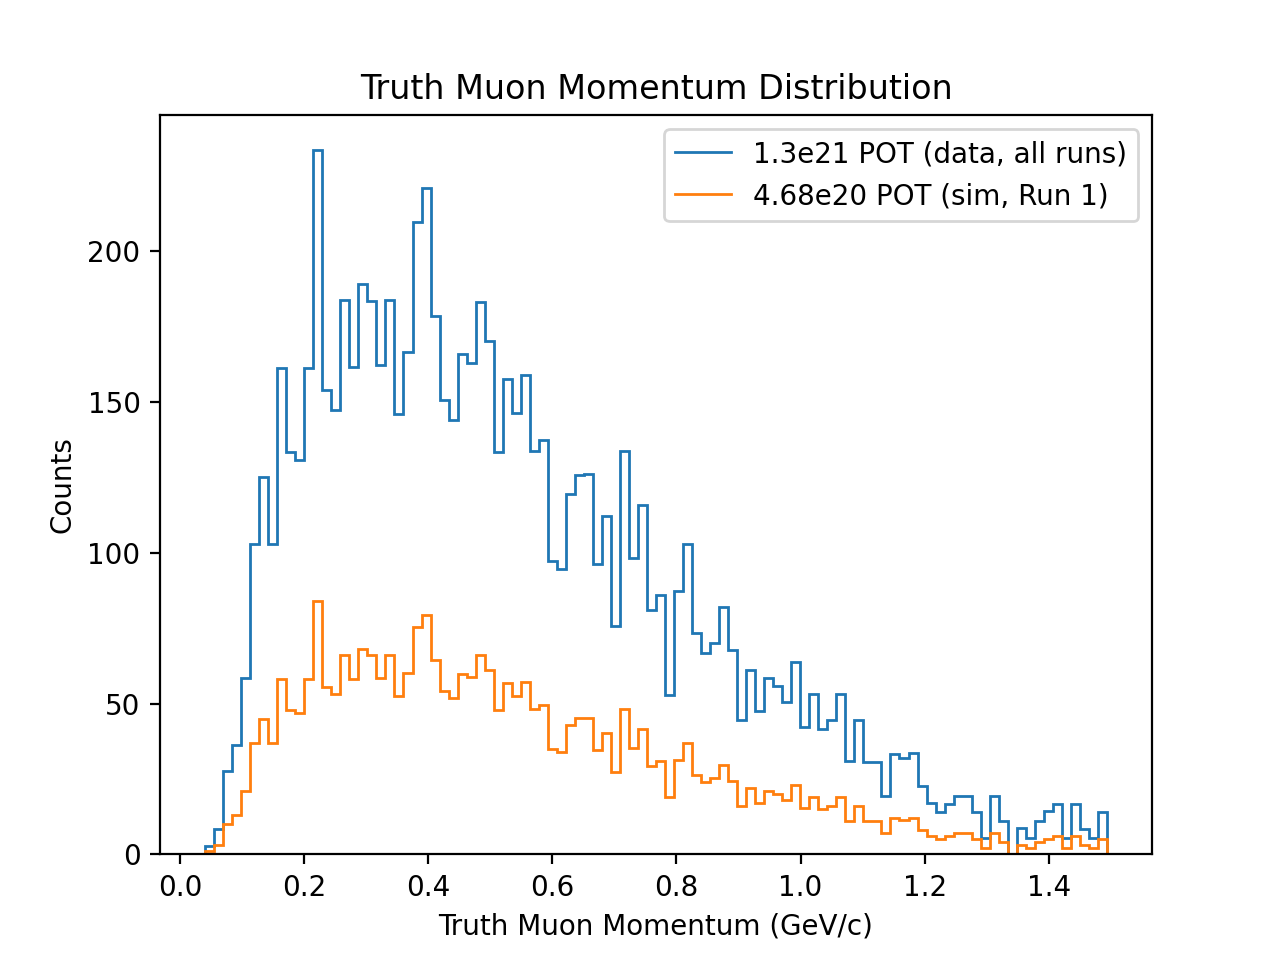

3065.4791369554378
8515.219824876212


In [7]:
# plotting only events that passed
# truth muon mom

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

counts, bins = np.histogram(passedTruthMomMu_arr, bins=100, weights=passedWeights_arr)
scaledCounts = counts*scale

print(sum(counts))
print(sum(scaledCounts))

plt.stairs(scaledCounts, bins, label="1.3e21 POT (data, all runs)")
plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")


plt.xlabel('Truth Muon Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Truth Muon Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


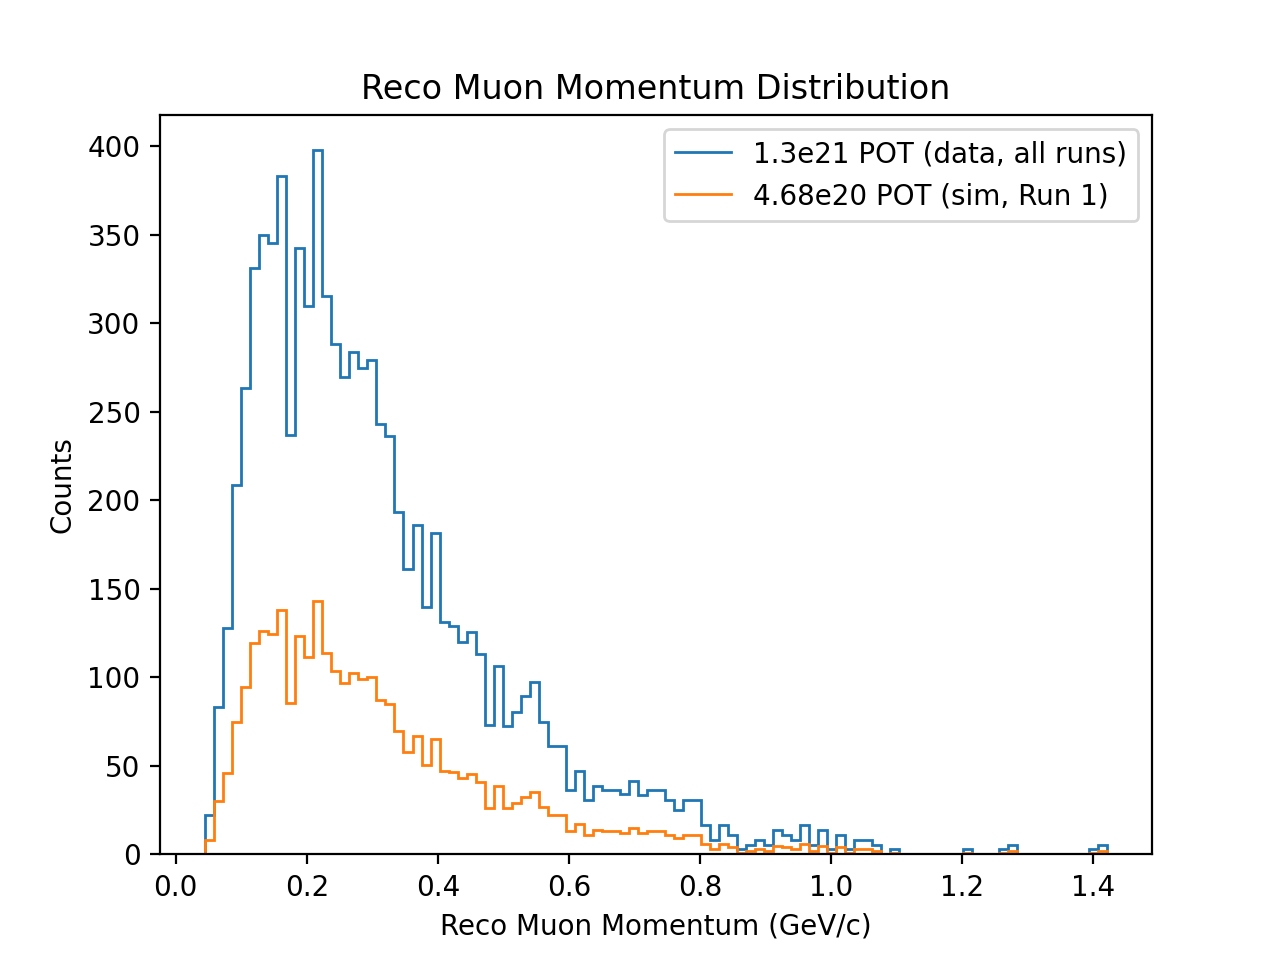

counts:  [  8.          30.          45.95605552  75.          94.77549136
 119.18490781 126.         124.3175963  137.84767014  85.25999367
 123.18042827 111.48579979 143.1087217  113.51783258 103.83407187
  97.01487863 102.1499436   98.90856312 100.44006419  87.41535306
  84.96697068  69.69098592  58.          66.88826093  50.34336329
  65.28028655  47.32143462  46.45533752  43.21625006  45.24737525
  40.66894445  26.24273646  38.34603739  26.          29.00004602
  32.13993168  35.          27.          22.          22.
  13.          17.          11.          14.          13.00192211
  13.          12.18562829  15.          12.          13.
  13.08625412  11.           9.          11.          11.
   6.           3.           6.           4.           1.
   2.           3.           2.           5.           4.
   3.           6.           2.           5.           1.
   4.           1.           3.           3.           2.
   0.           1.           0.           0.           0.

In [8]:
# plotting only events that passed
# reco muon mom

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

counts, bins = np.histogram(passedRecoMomMu_arr, bins=100, weights=passedWeights_arr)
scaledCounts = counts*scale

print("counts: ", counts)
print("scaledCounts: ", scaledCounts)

print(sum(counts))
print(sum(scaledCounts))


plt.stairs(scaledCounts, bins, label="1.3e21 POT (data, all runs)")
plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")

plt.xlabel('Reco Muon Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Reco Muon Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


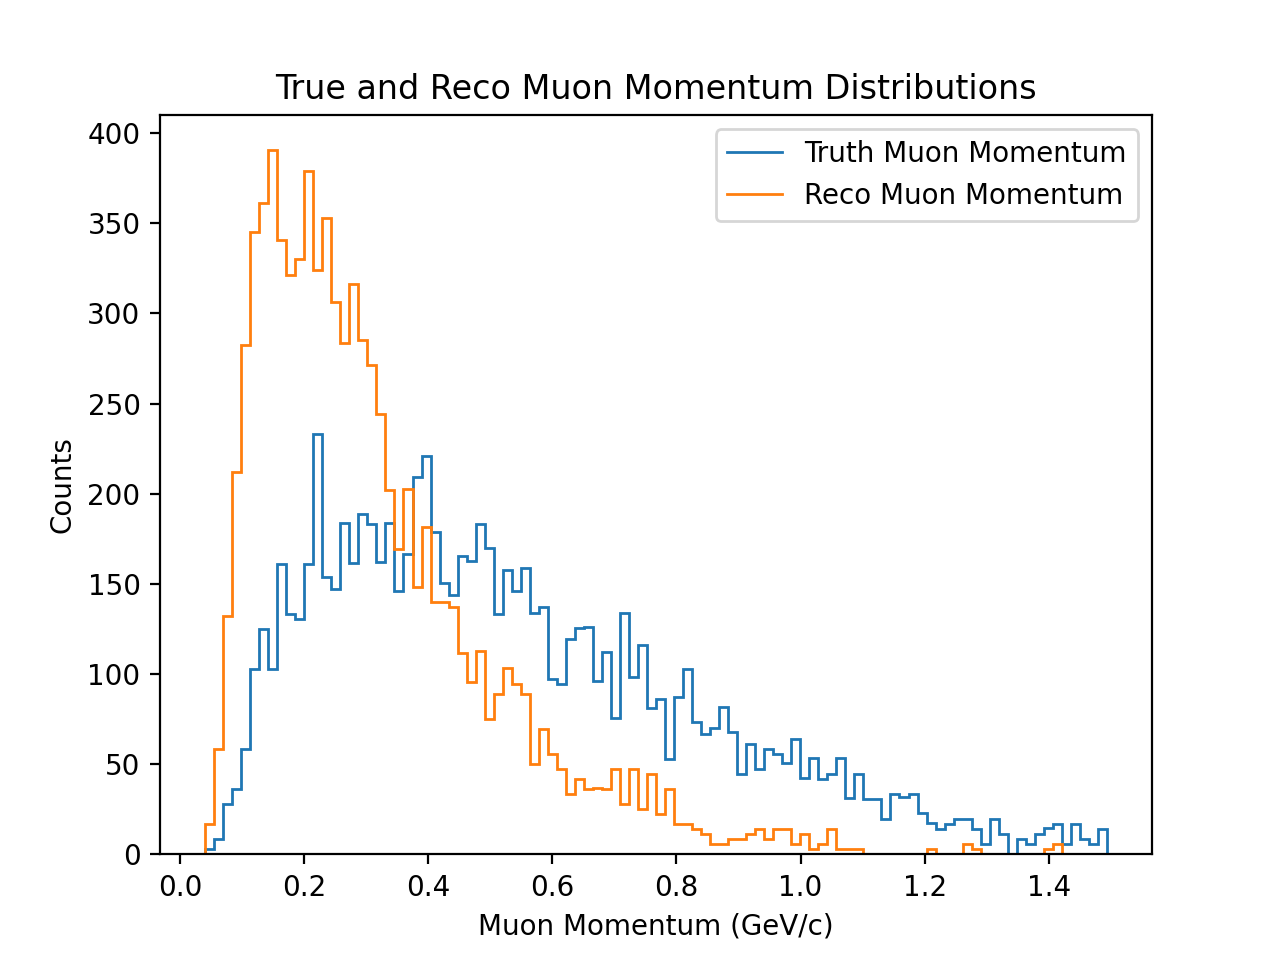

max value of truth:  1.4935290416162952
max value of reco:  1.420861679677904
maxRange:  1.4935290416162952
truth bins:  [0.04048339 0.05501385 0.06954431 0.08407476 0.09860522 0.11313567
 0.12766613 0.14219659 0.15672704 0.1712575  0.18578796 0.20031841
 0.21484887 0.22937933 0.24390978 0.25844024 0.2729707  0.28750115
 0.30203161 0.31656207 0.33109252 0.34562298 0.36015343 0.37468389
 0.38921435 0.4037448  0.41827526 0.43280572 0.44733617 0.46186663
 0.47639709 0.49092754 0.505458   0.51998846 0.53451891 0.54904937
 0.56357983 0.57811028 0.59264074 0.6071712  0.62170165 0.63623211
 0.65076256 0.66529302 0.67982348 0.69435393 0.70888439 0.72341485
 0.7379453  0.75247576 0.76700622 0.78153667 0.79606713 0.81059759
 0.82512804 0.8396585  0.85418896 0.86871941 0.88324987 0.89778033
 0.91231078 0.92684124 0.94137169 0.95590215 0.97043261 0.98496306
 0.99949352 1.01402398 1.02855443 1.04308489 1.05761535 1.0721458
 1.08667626 1.10120672 1.11573717 1.13026763 1.14479809 1.15932854
 1.173859

In [9]:
# muon truth and reco plot for comparison (distributions)

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(passedTruthMomMu_arr)
maxReco = np.max(passedRecoMomMu_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(passedTruthMomMu_arr)
minReco = np.min(passedRecoMomMu_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

countsTrue, binsTrue = np.histogram(passedTruthMomMu_arr, bins=numberBins, weights=passedWeights_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("truth bins: ", binsTrue)

print(sum(countsTrue))
print(sum(scaledCountsTrue))

countsReco, binsReco = np.histogram(passedRecoMomMu_arr, bins=numberBins, weights=passedWeights_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("reco bins: ", binsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Muon Momentum")
plt.stairs(scaledCountsReco, binsReco, label="Reco Muon Momentum")

plt.xlabel('Muon Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('True and Reco Muon Momentum Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


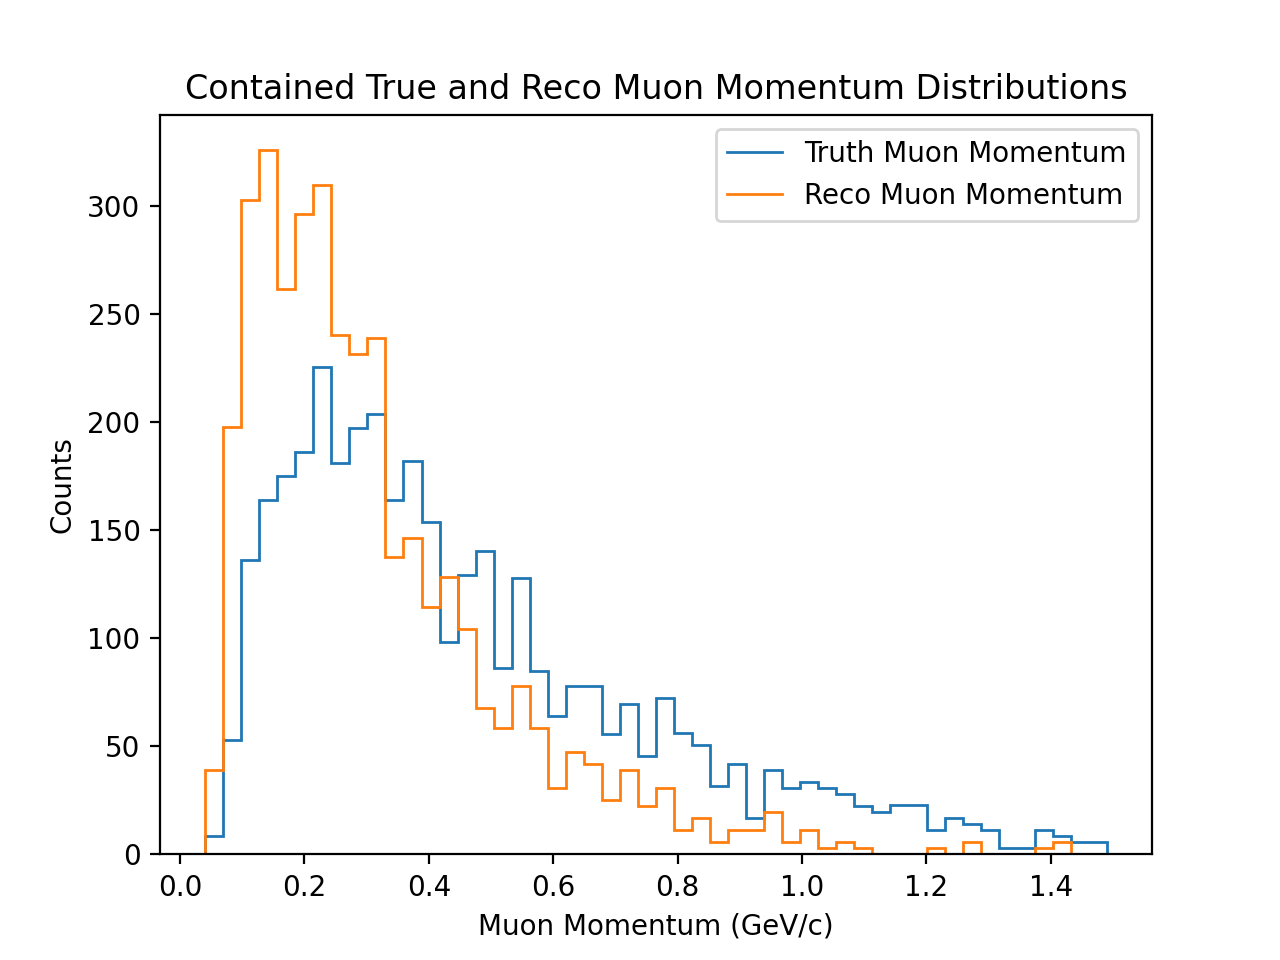

max value of truth:  1.4900209221926817
max value of reco:  1.420861679677904
maxRange:  1.4900209221926817
1330.0755769713628
3694.6543804760076
1330.0755769713626
3694.654380476009


In [10]:
# contained muon truth and reco plot for comparison (distributions)

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 50

maxTruth = np.max(passedTruthMomMuContained_arr)
maxReco = np.max(passedRecoMomMuContained_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(passedTruthMomMuContained_arr)
minReco = np.min(passedRecoMomMuContained_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

countsTrue, binsTrue = np.histogram(passedTruthMomMuContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print(sum(countsTrue))
print(sum(scaledCountsTrue))

# Note that here, I pass in the bins from the truth distrib above, so they are binned the same
countsReco, binsReco = np.histogram(passedRecoMomMuContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Muon Momentum")
plt.stairs(scaledCountsReco, binsReco, label="Reco Muon Momentum")

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.xlabel('Muon Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Contained True and Reco Muon Momentum Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


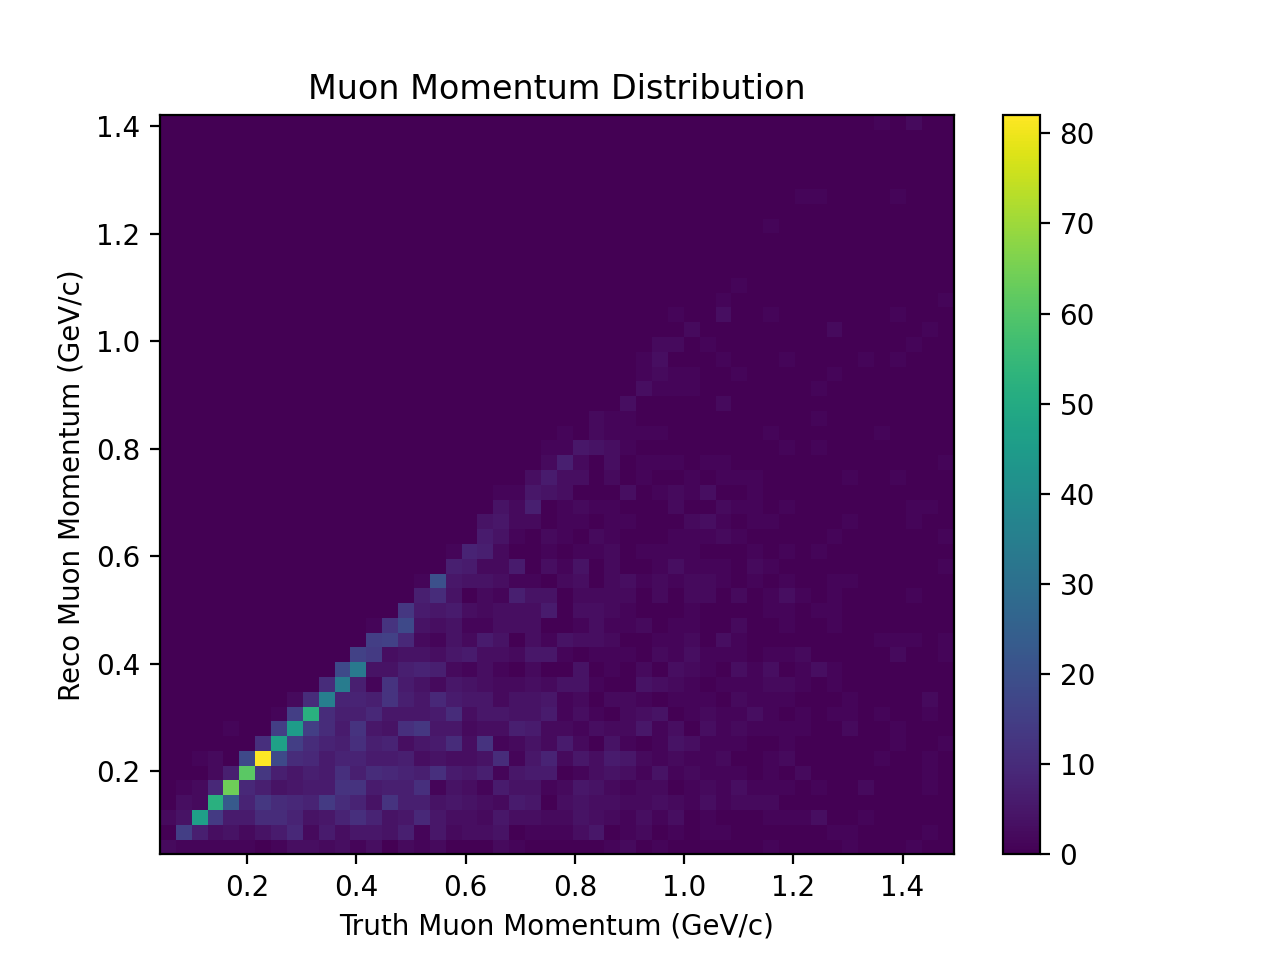

In [11]:
# OLD VERSION WITHOUT WEIGHTS AND PROPER BINNING AND SCALING!! 
# Look in "truthSelRecoPlots_requiringCompleteness" for proper way of making these plots. 
# muons 2d plot

fig, ax = plt.subplots()

h = ax.hist2d(passedTruthMomMu_arr, passedRecoMomMu_arr, bins = 50)
#h = ax.hist2d(passedTruthMomMu_arr, passedRecoMomMu_arr, bins = 50, weights=passedWeights_arr)
plt.xlabel('Truth Muon Momentum (GeV/c)')
plt.ylabel('Reco Muon Momentum (GeV/c)')
plt.title('Muon Momentum Distribution')
fig.colorbar(h[3], ax=ax)

# plt.show()

In [ ]:
# contained muons 2d plot

fig, ax = plt.subplots()

h = ax.hist2d(passedTruthMomMuContained_arr, passedRecoMomMuContained_arr, bins = 50)
plt.xlabel('Truth Muon Momentum (GeV/c)')
plt.ylabel('Reco Muon Momentum (GeV/c)')
plt.title('Contained Muon Momentum Distribution')
fig.colorbar(h[3], ax=ax)

# plt.show()

## Pions

In [ ]:
# plotting only events that passed
# truth pion mom

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

counts, bins = np.histogram(passedTruthMomPi_arr, bins=100, weights=passedWeights_arr)
scaledCounts = counts*scale

print(sum(counts))
print(sum(scaledCounts))

plt.stairs(scaledCounts, bins, label="1.3e21 POT (data, all runs)")
plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")

plt.xlabel('Truth Pion Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Truth Pion Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

print(sum(counts))
print(sum(scaledCounts))

In [ ]:
# plotting only events that passed
# reco pion mom

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

countsPi, binsPi = np.histogram(passedRecoMomPi_arr, bins=100, weights=passedWeights_arr)
scaledCounts = counts*scale

print(sum(counts))
print(sum(scaledCounts))

plt.stairs(scaledCounts, bins, label="1.3e21 POT (data, all runs)")
plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")

plt.xlabel('Reco Pion Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Reco Pion Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)


print(sum(counts))
print(sum(scaledCounts))

In [ ]:
# pion truth and reco plot for comparison (distributions)

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(passedTruthMomPi_arr)
maxReco = np.max(passedRecoMomPi_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(passedTruthMomPi_arr)
minReco = np.min(passedRecoMomPi_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

#------------

countsTrue, binsTrue = np.histogram(passedTruthMomPi_arr, bins=numberBins, range=binEdgeRange, weights=passedWeights_arr)
#countsTrue, binsTrue = np.histogram(passedTruthMomPi_arr, bins=100, weights=passedWeights_arr)
scaledCountsTrue = countsTrue*scale

print("Bins truth: ", binsTrue)


print(sum(countsTrue))
print(sum(scaledCountsTrue))

#countsReco, binsReco = np.histogram(passedRecoMomPi_arr, bins=binsTrue, weights=passedWeights_arr)
countsReco, binsReco = np.histogram(passedRecoMomPi_arr, bins=numberBins, range=binEdgeRange, weights=passedWeights_arr)
scaledCountsReco = countsReco*scale

print("Bins reco: ", binsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Pion Momentum")
plt.stairs(scaledCountsReco, binsReco, label="Reco Pion Momentum")
#plt.stairs(countsPi, binsTrue, label="TEST")


plt.xlabel('Pion Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('True and Reco Pion Momentum Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [ ]:
# contained pion truth and reco plot for comparison (distributions)

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(passedTruthMomPiContained_arr)
maxReco = np.max(passedRecoMomPiContained_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(passedTruthMomPiContained_arr)
minReco = np.min(passedRecoMomPiContained_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

#------------
countsTrue, binsTrue = np.histogram(passedTruthMomPiContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print(sum(countsTrue))
print(sum(scaledCountsTrue))

# Note that here, I pass in the bins from the truth distrib above, so they are binned the same
countsReco, binsReco = np.histogram(passedRecoMomPiContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Pion Momentum")
plt.stairs(scaledCountsReco, binsReco, label="Reco Pion Momentum")

plt.xlabel('Pion Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Contained True and Reco Pion Momentum Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [ ]:
# pion 2d plot

fig, ax = plt.subplots()

h = ax.hist2d(passedTruthMomPi_arr, passedRecoMomPi_arr, bins = 50, range=[[0.,1.0],[0., 1.0]])
plt.xlabel('Truth Pion Momentum (GeV/c)')
plt.ylabel('Reco Pion Momentum (GeV/c)')
plt.title('Pion Momentum Distribution')
fig.colorbar(h[3], ax=ax)

# plt.show()

In [ ]:
# contained pion 2d plot

fig, ax = plt.subplots()

h = ax.hist2d(passedTruthMomPiContained_arr, passedRecoMomPiContained_arr, bins = 50, range=[[0.,1.0],[0., 1.0]])
plt.xlabel('Truth Pion Momentum (GeV/c)')
plt.ylabel('Reco Pion Momentum (GeV/c)')
plt.title('Contained Pion Momentum Distribution')
fig.colorbar(h[3], ax=ax)

# plt.show()

## Leading Protons

In [ ]:
# plotting only events that passed
# truth leading proton mom

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

counts, bins = np.histogram(passedTruthMomLP_arr, bins=100, weights=passedWeights_arr)
scaledCounts = counts*scale
print(scale)

plt.stairs(scaledCounts, bins, label="1.3e21 POT (data, all runs)")
plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")

plt.xlabel('Truth Leading Proton Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Truth Leading Proton Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

print(sum(counts))
print(sum(scaledCounts))

In [ ]:
# plotting only events that passed
# reco leading proton mom

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

counts, bins = np.histogram(passedRecoMomLP_arr, bins=100, weights=passedWeights_arr)
scaledCounts = counts*scale
print(scale)

plt.stairs(scaledCounts, bins, label="1.3e21 POT (data, all runs)")
plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")

plt.xlabel('Reco Leading Proton Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Reco Leading Proton Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

print(sum(counts))
print(sum(scaledCounts))

In [ ]:
# leading proton truth and reco plot for comparison (distributions)

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(passedTruthMomLP_arr)
maxReco = np.max(passedRecoMomLP_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(passedTruthMomLP_arr)
minReco = np.min(passedRecoMomLP_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

#----------------

countsTrue, binsTrue = np.histogram(passedTruthMomLP_arr, bins=numberBins, weights=passedWeights_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("binsTruth", binsTrue)
print("sum bins truth: ", sum(countsTrue))
print("sum scaled bins truth: ", sum(scaledCountsTrue))

# Note that here, I pass in the bins from the truth distrib above, so they are binned the same
countsReco, binsReco = np.histogram(passedRecoMomLP_arr, bins=numberBins, weights=passedWeights_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("binsReco", binsReco)
print("sum bins reco: ", sum(countsReco))
print("sum scaled bins reco: ", sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Leading Proton Momentum")
plt.stairs(scaledCountsReco, binsReco, label="Reco Leading Proton Momentum")

print(all(binsTrue == binsReco))

plt.xlabel('Leading Proton Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('True and Reco Leading Proton Momentum Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [ ]:
# contained leading proton truth and reco plot for comparison (distributions)

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(passedTruthMomLPContained_arr)
maxReco = np.max(passedRecoMomLPContained_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(passedTruthMomLPContained_arr)
minReco = np.min(passedRecoMomLPContained_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

#----------------

countsTrue, binsTrue = np.histogram(passedTruthMomLPContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("binsTruth", binsTrue)
print("sum bins truth: ", sum(countsTrue))
print("sum scaled bins truth: ", sum(scaledCountsTrue))

# Note that here, I pass in the bins from the truth distrib above, so they are binned the same
countsReco, binsReco = np.histogram(passedRecoMomLPContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("binsReco", binsReco)
print("sum bins reco: ", sum(countsReco))
print("sum scaled bins reco: ", sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Leading Proton Momentum")
plt.stairs(scaledCountsReco, binsTrue, label="Reco Leading Proton Momentum")

plt.xlabel('Leading Proton Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Contained True and Reco Leading Proton Momentum Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [ ]:
# leading proton 2d plot

fig, ax = plt.subplots()

h = ax.hist2d(passedTruthMomLP_arr, passedRecoMomLP_arr, bins = 50, range=[[0.,2.0],[0., 2.0]])
plt.xlabel('Truth Leading Proton Momentum (GeV/c)')
plt.ylabel('Reco Leading Proton Momentum (GeV/c)')
plt.title('Leading Proton Momentum Distribution')
fig.colorbar(h[3], ax=ax)

# plt.show()

In [ ]:
# contained leading proton 2d plot

fig, ax = plt.subplots()

h = ax.hist2d(passedTruthMomLPContained_arr, passedRecoMomLPContained_arr, bins = 50, range=[[0.,2.0],[0., 2.0]])
plt.xlabel('Truth Leading Proton Momentum (GeV/c)')
plt.ylabel('Reco Leading Proton Momentum (GeV/c)')
plt.title('Contained Leading Proton Momentum Distribution')
fig.colorbar(h[3], ax=ax)

# plt.show()